# ***data mining project***
in this project we are creating a machine learning model working with Support Vectors Machine (SVM) algorithm that can predect weather a person has diabetes or not based on given features that we will extract from the dataset after preprocessing it

# **preprocessing the data**

we will start with importing the libraries and the dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


explore the data to learn basic information about it

In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset['Outcome'].value_counts()
#to learn about how many recored was classified with diabetes(indicate 1), and how many dosen't

0    500
1    268
Name: Outcome, dtype: int64

based on the data we found out that out of 768 case, 268 were diabetes

now we will start separating columns for attributes and the output column

In [ ]:
X = dataset.drop(['Outcome'], axis =1)
#X variable will hold all the attributes after dropping the output column

In [ ]:
Y = dataset['Outcome']
#Y variable will only hold the column of the output we want to predict

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

as it shows, the range of value for each attribute is very different, and that will badly affect our model and will be hard to train it on such data


to avoid this problem, we are going to standarized the data using the standrard scaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)
#fit the scaler to X set which contain the attributes we want to standarize

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
#assign the new scalered data to the variable X
X = standardized_data

now all values of attributes are in a similar range and we can pass them to the model without a problem

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# **Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
Z_train, Z_test, K_train, K_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

**we have to scale the data in order to get the optimial training results**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
Z_train = sc.fit_transform(Z_train)
Z_test = sc.transform(Z_test)

**each set of variables will be trained and tested on of the algorithms**

# **Training the Model**

**in our project we are using 2 different types of classification algorithms to compair performance and accuracy**

***we are using Support Vectors Machine***


***and Decision tree***

In [ ]:
classifier1 = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine classifir
classifier1.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
D_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
D_classifier.fit(Z_train, K_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# **making predictions**

**after training our models it's time to see the prediction they're going to predouce**

**prediction for the SVM algorithm**

In [ ]:
y_pred = classifier1.predict(X_test)

**prediction for the Decision tree algorithm**

In [ ]:
k_pred = D_classifier.predict(Z_test)

 # **Model Evaluation**

**now we have to find out the accuracy score with the help of the confusion matrix**

**for the SVM algorithm**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[91  9]
 [26 28]]


0.7727272727272727

**for the Decision tree algorithm**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(K_test,k_pred)
print(cm1)
accuracy_score(K_test, k_pred)

[[80 20]
 [25 29]]


0.7077922077922078

**As shown, we see that the support vector machine algorithm provided a higher accuracy dealing with data comparing to the decision tree algorithm**

**and this prove how different algorithms can performe at different levels of accuracy even while working on the same data**

##Data Visualization##

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

We trying here to see the dataset before we apply the preprocessing and before we train the model

##Visualize the SVM

In [ ]:
# Get support vector indices
support_vector_indices = classifier1.support_
print(support_vector_indices)

[  6   8  12  14  20  22  23  30  36  38  44  47  53  54  55  60  63  65
  71  83  84  89  93  94 100 102 106 110 115 120 123 126 144 147 150 155
 157 160 162 164 168 179 184 192 197 208 215 217 219 231 232 233 238 239
 240 241 248 249 252 254 263 266 267 269 272 273 286 289 296 298 299 304
 305 307 309 311 316 317 324 328 331 332 333 335 336 338 344 345 351 353
 357 358 366 368 370 382 391 396 399 403 410 411 412 413 420 427 430 433
 437 443 448 449 467 469 470 473 475 479 484 485 490 493 494 498 500 504
 507 510 512 516 517 518 520 522 527 528 529 533 545 547 552 555 563 569
 572 579 580 581 582 584 585 586 588 595 607 608 612   0   2   3   5   7
  11  19  26  27  29  34  35  41  50  56  58  68  69  73  76  78  87  88
  92  95  99 101 104 112 118 119 122 125 127 130 132 141 145 146 148 153
 163 166 171 173 176 177 186 190 193 200 203 204 216 220 224 227 230 234
 235 243 250 253 255 261 264 265 270 274 275 276 277 278 280 294 295 300
 301 312 314 318 319 320 325 334 341 342 347 354 35

In [ ]:
# Get number of support vectors per class
support_vectors_per_class = classifier1.n_support_
print(support_vectors_per_class)

[157 156]


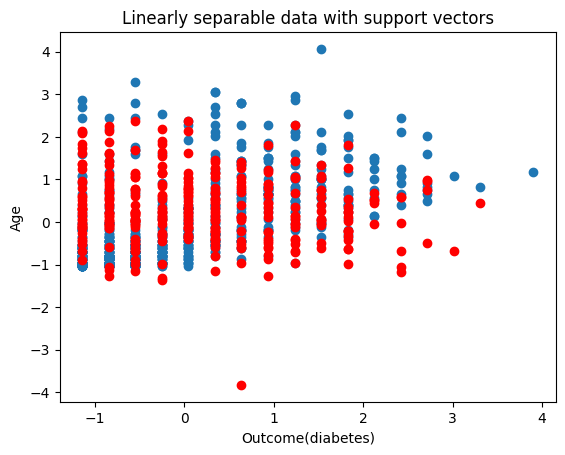

In [ ]:
# Get support vectors themselves
support_vectors = classifier1.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,7])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('Outcome(diabetes)')
plt.ylabel('Age')
plt.show()

##Visualize Decision Tree

In [ ]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(D_classifier, out_file=None,
                                feature_names=list(dataset.columns[:-1]),
                                class_names=['1', '0'],
                                filled=True)

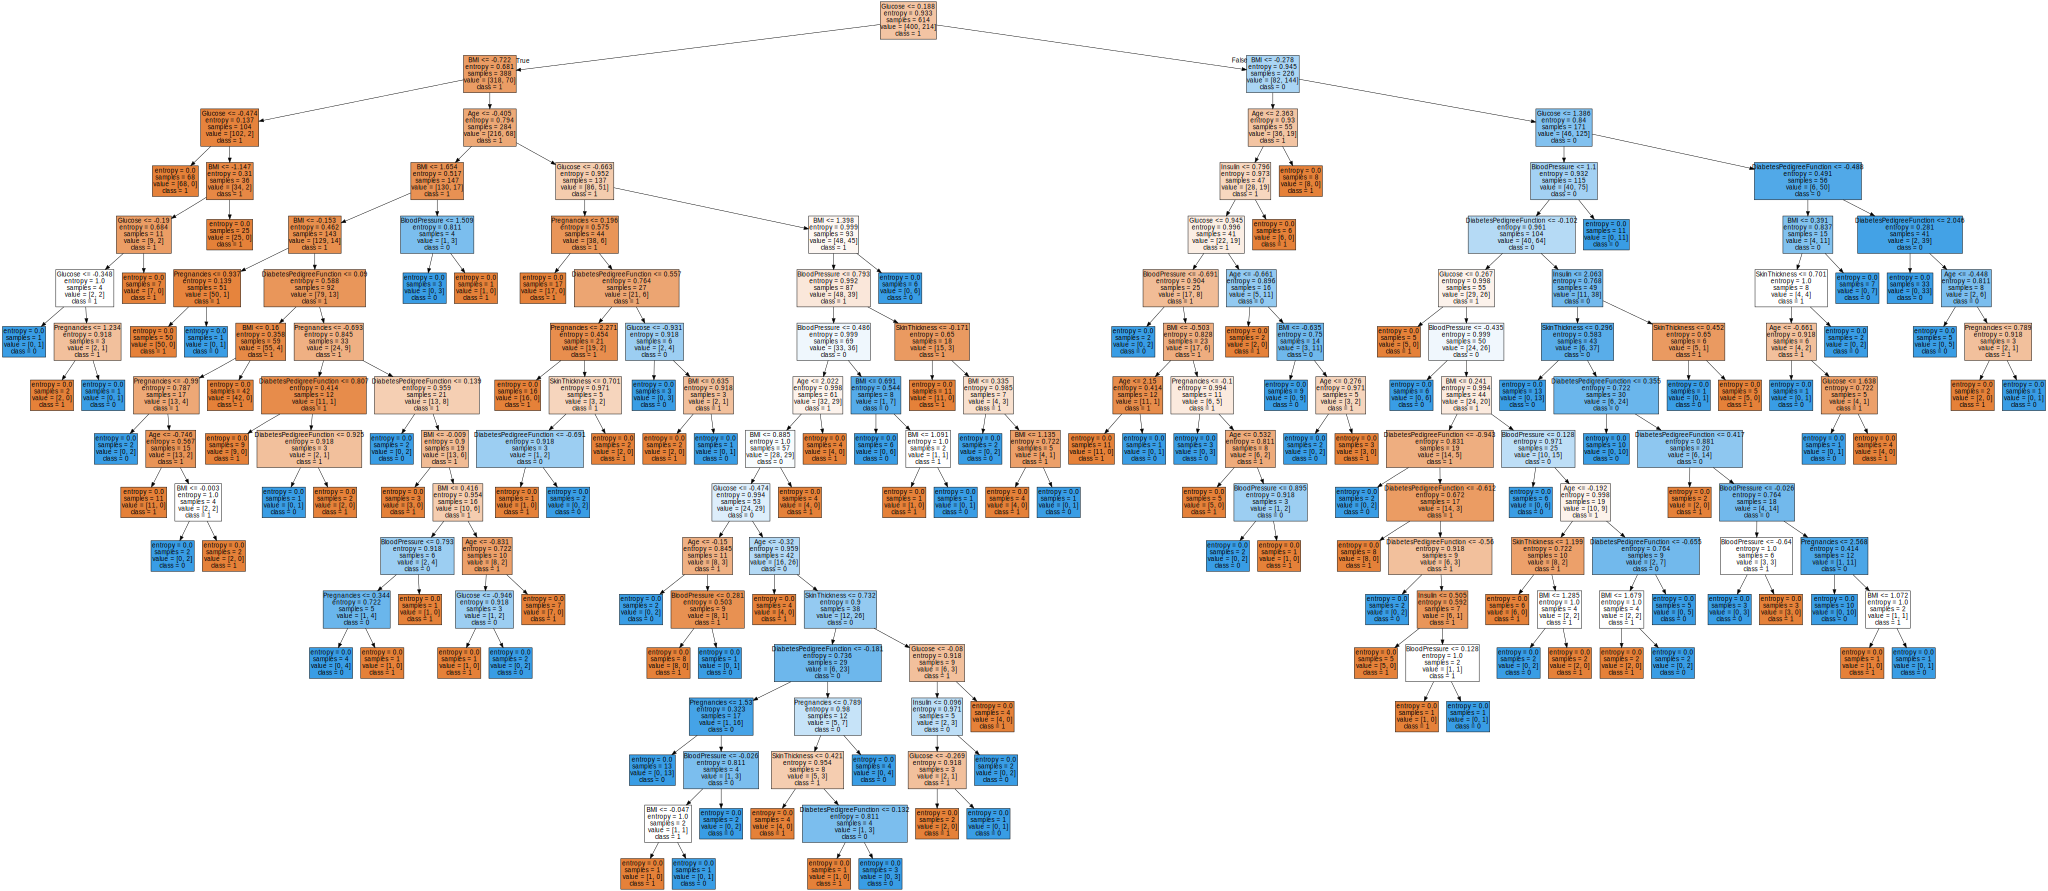

In [ ]:
graph = graphviz.Source(dot_data, format="png")
graph